get matrix, k , l
S0: initialize Ri by Li


In [1]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt
import copy as cp

In [7]:
def isklburnable(g, k, l):
    '''
    g: graph with networkx form
    k: number of sources
    l: number of rounds
    '''
    
    ################## Step0: get information
    N = nx.number_of_nodes(g)
    g_copy = cp.deepcopy(g)
    ''' '''
    #tip1: uncomment to draw origin graph
    print("input graph")
    nx.draw(g, with_labels=True, font_weight='bold')
    plt.show()
    ''' '''
    
    ################## Step1: get L
    L_list = []
    
    def updateL(input, g):
        #S1 get all leaves
        temp = [x for x in g.nodes() if g.degree(x)==1]
        #S2.1 remove leaves from graph
        for i in range(len(temp)):
            g.remove_node(temp[i])
        #S2.2 return all non-leaves 
        return [x for x in input if x not in temp]
    
    gl = cp.deepcopy(g_copy) #used for l
    initial = range(N) 
    
    for i in range(l): # who decide rounds??: l
        leaves = updateL(initial, gl) #get leaves left over
        initial = cp.deepcopy(leaves)
    
        L_list.append(initial)
    
    L_list.reverse()
    L_list = L_list[0:k] #only get 1st k rows
    ''' 
    #tip2: uncomment to show process graphs
    print("rest graph")
    nx.draw(gl, with_labels=True, font_weight='bold')
    plt.show()
    ''' 
    
    ################## Step2
    
    def findB(burned, gg):
        '''
        input: 
        a) burned: list of burned nodes
        b) gg: total graph
        output:
        nodes_burned_till_this_round
        '''
        nodes_burned_till_this_round = cp.copy(burned)
        # find all bunred vertice's neignbors
        for this_node in burned:
            nb_of_source = nx.all_neighbors(gg, this_node)
            
            for x in nb_of_source:
                if x not in nodes_burned_till_this_round: # keep unique
                    nodes_burned_till_this_round.append(x)
    
        return nodes_burned_till_this_round #返回B set
    
    source = -1*np.ones(k) #burnding sequence
    bestsequence = [[], 0] #1st entry: burning sequence; 2nd: number of burned nodes by this bs
    
    R_dynamic = [cp.copy(L_list[0])]
    burned = []
    #old_burned = []
    level_burned = [] 
    
    l_round = l - k
    ''' '''
    print("start here")
    print("R ini")
    print(R_dynamic)
    
    ''' '''
    def updateR(num, burned, source, level_burned, R_dynamic):
        # 0 judge and recursion
        
        print("loop")
        print(num, "time", burned)
        
        print(R_dynamic[num])#TODO: 外部变量全部要在内部重设
        if len(R_dynamic[num]) == 0: #this row does not exist
            if num == 0:
                return  burned, source, level_burned, R_dynamic
                #return bestsequence[0]
            else:
            # Walk up
                print("go up")
                print(R_dynamic)
                print(level_burned)
                R_dynamic.remove(R_dynamic[num])
                level_burned.remove(level_burned[num - 1])
                #l_round = l_round + 1
                upburned = []
                for i in level_burned:
                    upburned = upburned + i
                
                updateR(num - 1, upburned, source, level_burned, R_dynamic)
  
        
        # 1. pick burn and remove 
        source[num] = R_dynamic[num][0]
        R_dynamic[num].remove(R_dynamic[num][0])
        old_burned = cp.copy(burned)
        burned.append(source[num])
        
    
        # 2. update R
    
        # 2.1 get all burned nodes(B) in this round
        B = findB(burned, g)
        
        print(burned)
        print(B)
        print("\n")
        
        # PS: 也可以让findB只返回新burn的vertices
        # 2.2 burn
        if len(level_burned) == 0:
            level_burned.append(B)
        else:
            level_burned.append([node for node in B if node not in old_burned])
        burned = B #update burn
    
    
        # 2.2 get L/B and update to the total R
        temp = [node for node in L_list[num] if node not in B]
        R_dynamic.append(temp)
        
        
        print("go down")
        print(R_dynamic)
        print(level_burned)
        # 3. Walk down: if have not reach the k-1 level， to next level(0, 1, ..., k-2, k-1)
        # l_round = l_round - 1
        if num < k - 2: 
            updateR(num + 1, burned, source, level_burned, R_dynamic)
            
        return burned, source, level_burned, R_dynamic
    ####### process:
    burned, source, level_burned, R_dynamic = updateR(0, burned, source, level_burned, R_dynamic)
    while len(R_dynamic[0]) != 0:
        while len(R_dynamic[k - 1]) != 0:
            source[k - 1] = R_dynamic[k - 1][0] # pick 1st 
            R_dynamic[k-1].remove(R_dynamic[k - 1][0]) #remove 1st
        
            burned.append(source[k-1]) 
            B = burned
        
            #burned B for rest rounds
            for rest_rounds in range(l_round):
                B = findB(B)
        
            if len(B) == N:
                return source
            
            burned.remove(source[k-1])
            
            if bestsequence[1] < len(B):
                bestsequence[0] = source     
        R_dynamic.remove(R_dynamic[k - 1])         
        level_burned.remove(level_burned[k-1])
        burned, source, level_burned, R_dynamic = updateR(k-2, burned, source, level_burned, R_dynamic)   
        
        ''' '''
        print(L_list)
        print(R_dynamic)
        print(burned)
        print(level_burned)
        
        ''' '''
    return bestsequence[0]

    

input graph


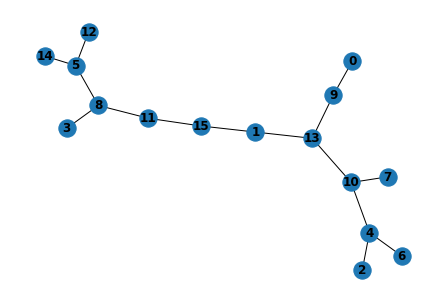

start here
R ini
[[1, 15]]
loop
0 time []
[1, 15]
[1.0]
[1.0, 13, 15]


go down
[[15], []]
[[1.0, 13, 15]]
loop
1 time [1.0, 13, 15]
[]
go up
[[15], []]
[[1.0, 13, 15]]
loop
0 time []
[15]
[15.0]
[15.0, 1, 11]


go down
[[], []]
[[15.0, 1, 11]]
loop
1 time [15.0, 1, 11]
[]
go up
[[], []]
[[15.0, 1, 11]]
loop
0 time []
[]


IndexError: list index out of range

In [8]:
g = nx.random_tree(16)
bs = isklburnable(g, 4, 4)
bs